### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2 id="reading_data">Reading the data in</h2>

In [2]:
df = pd.read_csv("loan.csv")

# take a look at the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Lets select some features that we want to use for regression.

In [3]:
print(df.info())
print(df.shape)
print(df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
(614, 13)
7982


In [4]:
df.apply(lambda x:sum(x.isnull()),axis=0)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['Gender']=df['Gender'].fillna('Male')
df['Married']=df['Married'].fillna('Yes')
df['Dependents']=df['Dependents'].fillna('0')
df['Self_Employed']=df['Self_Employed'].fillna('No')
df['LoanAmount']=df['LoanAmount'].fillna(df.LoanAmount.mean())
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)
df['Credit_History'] = df.Credit_History.fillna(1.0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
for i in range(1,12):
    print(df[df.columns[i]].value_counts())
    print()

Male      502
Female    112
Name: Gender, dtype: int64

Yes    401
No     213
Name: Married, dtype: int64

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     532
Yes     82
Name: Self_Employed, dtype: int64

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
570.000000     1
300.000000     1
376.000000     1
117.000000     1
311.000000     1
Name: LoanAmount, Length: 204, dtype: int64

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0

<h2 id="prediction">Splitting training data</h2>


In [7]:
# write your code here
x=df.iloc[:,1:12].values
y=df.iloc[:,12].values
x,y

(array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
        ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
        ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
        ...,
        ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
        ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
        ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object),
 array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
        'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
        'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
        'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
        'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
        'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
        'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
        'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
        'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',

In [8]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in range(0,5):
    x[:,i]=label.fit_transform(x[:,i])
x[:,10]=label.fit_transform(x[:,10]) 
y=label.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [10]:
valdata=X_train
X_train

array([[1, 1, 3, ..., 360.0, 1.0, 0],
       [1, 1, 0, ..., 360.0, 1.0, 0],
       [1, 1, 3, ..., 180.0, 1.0, 0],
       ...,
       [1, 1, 3, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [0, 1, 0, ..., 360.0, 1.0, 1]], dtype=object)

In [11]:
X_test

array([[1, 0, 0, ..., 360.0, 1.0, 1],
       [0, 0, 0, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       ...,
       [1, 1, 0, ..., 180.0, 1.0, 0],
       [1, 1, 2, ..., 180.0, 0.0, 2],
       [1, 1, 0, ..., 360.0, 1.0, 0]], dtype=object)

In [12]:
from sklearn import preprocessing 
X_train = preprocessing.StandardScaler().fit_transform(X_train)
X_test = preprocessing.StandardScaler().fit_transform(X_test)
X_train

array([[ 0.45832213,  0.68260517,  2.15219873, ...,  0.27573121,
         0.42269889, -1.35480842],
       [ 0.45832213,  0.68260517, -0.78196554, ...,  0.27573121,
         0.42269889, -1.35480842],
       [ 0.45832213,  0.68260517,  2.15219873, ..., -2.6662009 ,
         0.42269889, -1.35480842],
       ...,
       [ 0.45832213,  0.68260517,  2.15219873, ...,  0.27573121,
         0.42269889, -0.08389869],
       [ 0.45832213,  0.68260517, -0.78196554, ...,  0.27573121,
         0.42269889,  1.18701105],
       [-2.18187153,  0.68260517, -0.78196554, ...,  0.27573121,
         0.42269889, -0.08389869]])

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Classification Algorithms

## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier as knn
model=knn(n_neighbors=5,metric='minkowski',p=4).fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))

The accuracy of KNN is:  0.6439024390243903
[[ 15  45]
 [ 28 117]]


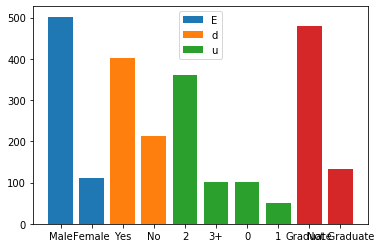

In [15]:
xa=[]
ya=[]
for i in range(1,5):
    plt.legend(df.columns[i])
    xa=np.array(df[df.columns[i]].value_counts())
    ya=list(set(df[df.columns[i]]))
    
    plt.bar(ya,xa)    

<BarContainer object of 2 artists>

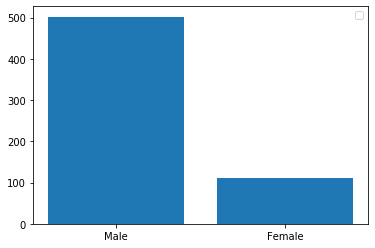

In [16]:

xa=np.array(df[df.columns[1]].value_counts())
ya=list(set(df[df.columns[1]]))
plt.legend(df.columns[1])
plt.bar(ya,xa)

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

C:\Users\chetna kaushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of Logistic Regression is:  0.7073170731707317


In [18]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,  60],
       [  0, 145]], dtype=int64)

## SVM

In [19]:
from sklearn.svm import SVC
from sklearn import metrics
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('The accuracy of SVM is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of SVM is:  0.7073170731707317


In [20]:

# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[  0  60]
 [  0 145]]


## Decision Tree Classification

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1])

In [34]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))

The accuracy of Decision Tree Classifier is:  0.5365853658536586
[[20 40]
 [55 90]]


## Accuracy Results

The accuracy of KNN is: 64.39 %

The accuracy of Logistic Regression is: 70.73 %

The accuracy of SVM is: 70.73 %

The accuracy of Decision Tree Classifier is: 53.65 %

In [23]:
import pickle 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)  

C:\Users\chetna kaushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
from sklearn.externals import joblib
joblib.dump(knn, 'loanpredictor.pkl')

C:\Users\chetna kaushik\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['loanpredictor.pkl']

In [29]:
modelloaded=joblib.load('loanpredictor.pkl')

In [33]:
y_pred=modelloaded.predict(valdata[0])

TypeError: predict() missing 1 required positional argument: 'X'

In [32]:
valdata[0]

array([1, 1, 3, 1, 1, 5703, 0.0, 130.0, 360.0, 1.0, 0], dtype=object)